#### Customer churn prediction 
It is a data-driven approach to identify which customers are likely to stop using a product or service within a given time frame. It’s widely used in industries like telecom, banking, SaaS, and retail because retaining customers is often more cost-effective than acquiring new ones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)


In [2]:
customer_churn_data=pd.read_csv("customer_churn_synthetic.csv")

In [3]:
customer_churn_data.head()

,tenure_months,monthly_charges,data_usage_gb,customer_age,is_premium_plan,num_support_calls,contract_length_months,payment_delay_days,target
0,0.496714,-0.861711,0.410152,1.489913,NaN,1.0,1.827652,0.596387,1
1,-0.138264,0.709422,0.237253,2.212543,0.0,2.0,-5.856166,1.661195,0
2,0.647689,1.379592,0.375686,0.219328,0.0,0.0,0.530852,2.112002,0
3,1.523030,4.831531,0.197039,1.511257,1.0,2.0,-1.390010,0.626894,0
4,-0.234153,2.834830,2.321932,-2.159613,0.0,1.0,-1.298710,-0.193395,0


In [4]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tenure_months           2881 non-null   float64
 1   monthly_charges         2881 non-null   float64
 2   data_usage_gb           2881 non-null   float64
 3   customer_age            2880 non-null   float64
 4   is_premium_plan         2881 non-null   float64
 5   num_support_calls       2882 non-null   float64
 6   contract_length_months  2882 non-null   float64
 7   payment_delay_days      2883 non-null   float64
 8   target                  3000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 211.1 KB


In [5]:
print("\nClass distribution:")
customer_churn_data['target'].value_counts(normalize=True)


Class distribution:


target
0    0.55
1    0.45
Name: proportion, dtype: float64

In [6]:
print("\nMissing values per column:")
customer_churn_data.isnull().sum()


Missing values per column:


tenure_months             119
monthly_charges           119
data_usage_gb             119
customer_age              120
is_premium_plan           119
num_support_calls         118
contract_length_months    118
payment_delay_days        117
target                      0
dtype: int64

In [9]:
customer_churn_data.head()

,tenure_months,monthly_charges,data_usage_gb,customer_age,is_premium_plan,num_support_calls,contract_length_months,payment_delay_days,target
0,0.496714,-0.861711,0.410152,1.489913,NaN,1.0,1.827652,0.596387,1
1,-0.138264,0.709422,0.237253,2.212543,0.0,2.0,-5.856166,1.661195,0
2,0.647689,1.379592,0.375686,0.219328,0.0,0.0,0.530852,2.112002,0
3,1.523030,4.831531,0.197039,1.511257,1.0,2.0,-1.390010,0.626894,0
4,-0.234153,2.834830,2.321932,-2.159613,0.0,1.0,-1.298710,-0.193395,0


In [11]:
X = customer_churn_data.drop('target', axis=1)
y = customer_churn_data['target']

ValueError: num must be an integer with 1 <= num <= 4, not 5

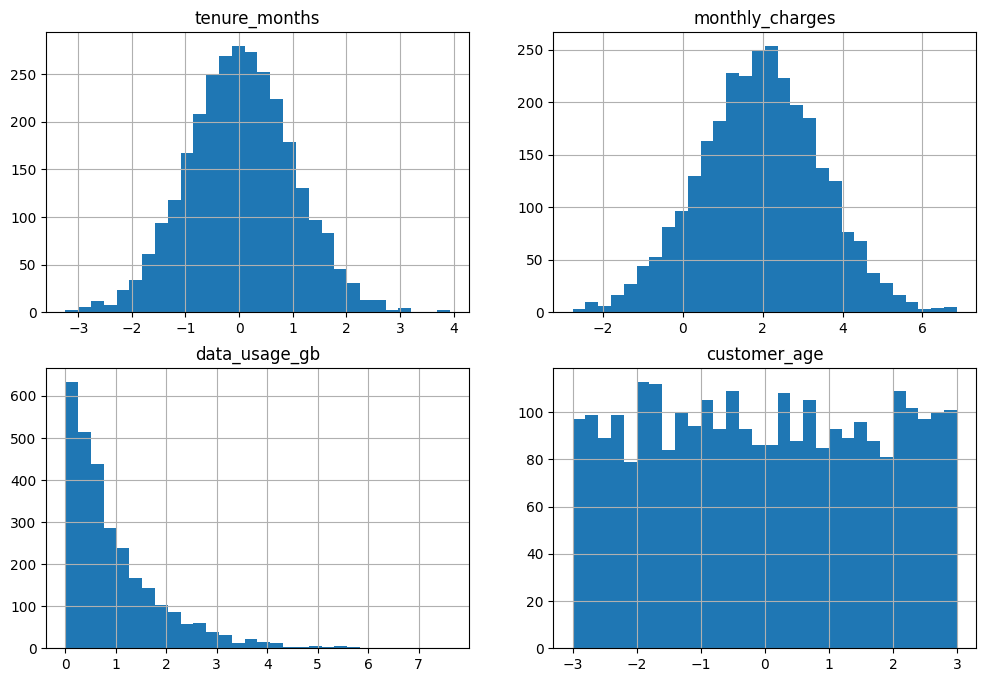

In [12]:
# Plot distributions for the first 4 features and class balance
plt.figure(figsize=(12, 8))
for i, col in enumerate(X[:4], 1):
    plt.subplot(2, 2, i)
    customer_churn_data[col].hist(bins=30)
    plt.title(col)
plt.suptitle('Feature distributions (first 4)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

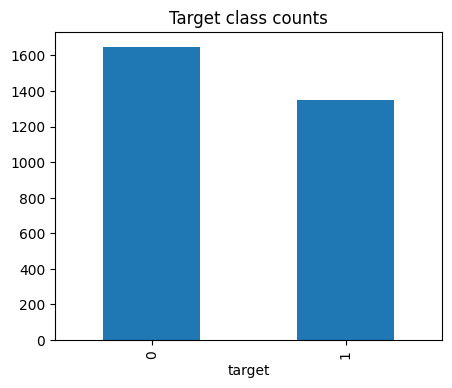

In [15]:
plt.figure(figsize=(5,4))
customer_churn_data['target'].value_counts().plot(kind='bar')
plt.title('Target class counts')
plt.show()

In [20]:
# 3) Prepare data: train-test split and pipeline for imputation + scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

## stratify=y ensures that the proportion of classes in y remains the same in both training and test sets.

In [21]:
# Create a pipeline: imputer -> scaler -> classifier
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [22]:
# Baseline logistic regression with default hyperparameters
baseline_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

baseline_pipeline.fit(X_train, y_train)

y_pred = baseline_pipeline.predict(X_test)
y_prob = baseline_pipeline.predict_proba(X_test)[:, 1]

print("\nBaseline model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))



Baseline model evaluation:
Accuracy: 0.9183333333333333
Precision: 0.9018181818181819
Recall: 0.9185185185185185
F1: 0.9100917431192661
ROC AUC: 0.9709652076318743

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       330
           1       0.90      0.92      0.91       270

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [24]:
## k-Fold Cross-Validation (StratifiedKFold) on training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

cv_scores = cross_val_score(cv_pipeline, X_train, y_train, cv=skf, scoring='roc_auc')
print("\n5-fold CV ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", np.mean(cv_scores))


5-fold CV ROC AUC scores: [0.9518273  0.96655794 0.96569865 0.96515502 0.96434834]
Mean CV ROC AUC: 0.9627174523007855


In [25]:
## Hyperparameter tuning with GridSearchCV
# We'll tune penalty (l1, l2), C (inverse of regularization strength), and solver.
# Note: l1 penalty requires solvers 'liblinear' or 'saga'. We'll configure parameter grid accordingly.
param_grid = [
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs', 'liblinear'],
    },
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['liblinear', 'saga'],
    },
]

grid_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

grid_search = GridSearchCV(grid_pipeline, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\nBest params from GridSearch:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)


# 7) Evaluate the best model on the held-out test set
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTest set evaluation for best model:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))
print("\nClassification report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best params from GridSearch: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV ROC AUC: 0.9627630471380473

Test set evaluation for best model:
Accuracy: 0.9183333333333333
Precision: 0.9077490774907749
Recall: 0.9111111111111111
F1: 0.9094269870609981
ROC AUC: 0.9709315375982043

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       330
           1       0.91      0.91      0.91       270

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

Confusion matrix:
 [[305  25]
 [ 24 246]]


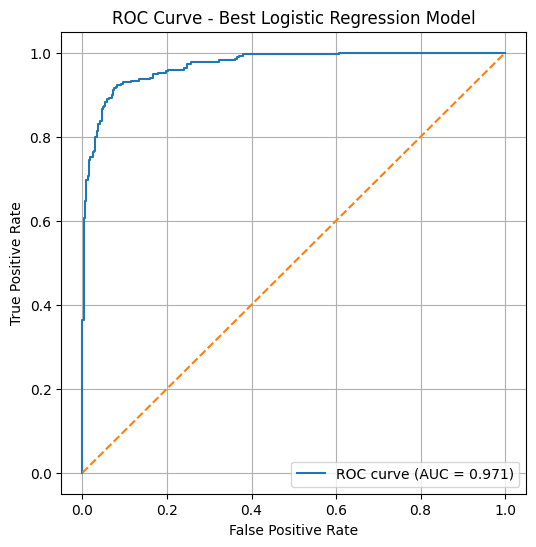

In [27]:
# 8) Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# %%
# 9) Optional: Save the dataset and the model for later use
# You can uncomment the following lines if you want to save locally in a notebook environment.
# customer_churn_data.to_csv('synthetic_logistic_data.csv', index=False)
# import joblib
# joblib.dump(best_model, 'best_logistic_model.joblib')

# %%
# 10) Handy functions: function to run full pipeline end-to-end given a parameter grid

def run_grid_search(X_train, y_train, param_grid, cv=5, random_state=42):
    skf_local = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    pipeline_local = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=random_state))
    ])
    gs = GridSearchCV(pipeline_local, param_grid, cv=skf_local, scoring='roc_auc', n_jobs=-1, verbose=0)
    gs.fit(X_train, y_train)
    return gs

# Example usage:
# gs = run_grid_search(X_train, y_train, param_grid, cv=5)
# print(gs.best_params_, gs.best_score_)




### Hyperparameter tuning grid for Logistic Regression in scikit-learn, typically used with GridSearchCV or RandomizedSearchCV.
#### Explanation of Each Parameter

- clf__penalty: ['l2']

***Penalty refers to the type of regularization applied to prevent overfitting.
'l2' = Ridge regularization (most common for Logistic Regression).
Other options (not in this grid): 'l1' (Lasso), 'elasticnet'*** 

- clf__C: [0.01, 0.1, 1, 10, 100]

***C is the inverse of regularization strength.
Smaller C → stronger regularization (simpler model).
Larger C → weaker regularization (model fits data more closely).
This grid tests a wide range from very strong regularization (0.01) to almost no regularization (100)*** 


- clf__solver: ['lbfgs', 'liblinear']

***Solver is the algorithm used to optimize the logistic regression cost function.
'lbfgs': Good for large datasets, supports L2 penalty.
'liblinear': Works well for small datasets, supports L1 and L2 penalties*** 

### Why tune these?

- Different penalties and solvers affect convergence and performance.
- C controls bias-variance tradeoff.
- Choosing the right combination improves accuracy and generalization.